In [1]:
import numpy as np
import gym
from matplotlib import pyplot as plt

In [2]:
def action_selector(actions, values, epsilon):
    """ An epsilon-greedy action selector.
        Give list of actions, assumed values for each action,
            and probability of NOT acting greedily.
    """
    greedy = np.random.choice([1,0], p=[1-epsilon, epsilon])
    if greedy:
        return actions[np.argmax(values)] # argmax in reverse to favor right action (not left)
    else:
        return np.random.choice(actions)
    
def feature_maker(observation, action, o_dim, a_dim):
    phi = np.zeros(o_dim * a_dim)
    phi[action*o_dim: (action+1)*o_dim] = observation
    phi /= 255  # scale to [0,1].  Just guessing here.
    return phi

In [3]:
n_episodes = 300
# n_tilings = 10
# tiling_dim = 10
# max_tile_size = 1024 # ?? how to pick
# self.iht = IHT(self.max_tile_size)

env = gym.make('MsPacman-ram-v0')
n_action = env.action_space.n
obs_dim = 128  # 128 byte ram from atari
# obs_highs = env.observation_space.high
# obs_lows = env.observation_space.low
# scales = [tiling_dim / (obs_highs[i] - obs_lows[i]) for i in range(len(obs_highs))]

# init weights
theta = np.zeros(obs_dim *  n_action) # concatenate per action
n_timesteps = 1500


epsilon = .2 # (greedy)
gamma = .99
lam = .9
alpha = .1
actions = range(env.action_space.n)
render = False
verbose = True

# Run the learning loop

In [4]:
rewards = []
for i_episode in range(n_episodes):
    epsilon *= .92
    epsilon = max(epsilon, .04)
    observation = env.reset()

    # Choose an action espilon-greedily

    phis = [feature_maker(observation, a, obs_dim, n_action) for a in actions] # get features for observation
    q_vals = [theta.dot(phi) for phi in phis]
    action = action_selector(actions, q_vals, epsilon)
    phi_sa = phis[action]
    q_sa = q_vals[action]

    # initialize e = 0
    e = np.zeros_like(theta)
    
    total_r = 0

    for t in range(n_timesteps):
        if render: env.render()

        # Take action, observe change, choose new a, get new features and q_sa_ and do update
        observation, reward, done, info = env.step(action)
        total_r += reward

        # Choose next action epsilon-greedily
        phis = [feature_maker(observation, a, obs_dim, n_action) for a in actions]
        q_vals = [theta.dot(phi) for phi in phis]
        action = action_selector(actions, q_vals, epsilon)
        phi_sa_ = phis[action]
        q_sa_ = q_vals[action]

        # Perform updates
        d = reward + gamma * q_sa_ - q_sa
        e = gamma * lam * e + alpha * (1 - gamma * lam * e.dot(phi_sa)) * phi_sa
        theta = theta + d * e + alpha * (q_sa - theta.dot(phi_sa)) * phi_sa


        q_sa = q_sa_
        phi_sa = phi_sa_


        if done:
            rewards.append(total_r)
            if verbose: print("Episode finished after {} timesteps with total reward {}".format(t+1, total_r))
            break

env.close()

/home/sterling/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in multiply


Episode finished after 577 timesteps with total reward 280.0
Episode finished after 630 timesteps with total reward 170.0
Episode finished after 468 timesteps with total reward 150.0


/home/sterling/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


Episode finished after 908 timesteps with total reward 310.0
Episode finished after 658 timesteps with total reward 250.0
Episode finished after 499 timesteps with total reward 150.0
Episode finished after 839 timesteps with total reward 520.0
Episode finished after 551 timesteps with total reward 120.0
Episode finished after 604 timesteps with total reward 200.0
Episode finished after 542 timesteps with total reward 120.0
Episode finished after 612 timesteps with total reward 370.0
Episode finished after 436 timesteps with total reward 90.0
Episode finished after 858 timesteps with total reward 640.0
Episode finished after 464 timesteps with total reward 230.0
Episode finished after 384 timesteps with total reward 80.0
Episode finished after 790 timesteps with total reward 420.0
Episode finished after 531 timesteps with total reward 130.0
Episode finished after 980 timesteps with total reward 420.0
Episode finished after 596 timesteps with total reward 180.0
Episode finished after 459

Episode finished after 539 timesteps with total reward 140.0
Episode finished after 664 timesteps with total reward 310.0
Episode finished after 564 timesteps with total reward 200.0
Episode finished after 508 timesteps with total reward 120.0
Episode finished after 588 timesteps with total reward 170.0
Episode finished after 453 timesteps with total reward 110.0
Episode finished after 445 timesteps with total reward 70.0
Episode finished after 503 timesteps with total reward 200.0
Episode finished after 545 timesteps with total reward 130.0
Episode finished after 760 timesteps with total reward 170.0
Episode finished after 605 timesteps with total reward 240.0
Episode finished after 648 timesteps with total reward 120.0
Episode finished after 491 timesteps with total reward 110.0
Episode finished after 728 timesteps with total reward 280.0
Episode finished after 628 timesteps with total reward 170.0
Episode finished after 498 timesteps with total reward 70.0
Episode finished after 568

Episode finished after 535 timesteps with total reward 200.0
Episode finished after 429 timesteps with total reward 60.0
Episode finished after 486 timesteps with total reward 170.0
Episode finished after 425 timesteps with total reward 180.0
Episode finished after 493 timesteps with total reward 250.0
Episode finished after 770 timesteps with total reward 340.0
Episode finished after 421 timesteps with total reward 60.0
Episode finished after 500 timesteps with total reward 120.0
Episode finished after 352 timesteps with total reward 60.0
Episode finished after 487 timesteps with total reward 110.0
Episode finished after 898 timesteps with total reward 610.0
Episode finished after 578 timesteps with total reward 140.0
Episode finished after 620 timesteps with total reward 170.0
Episode finished after 686 timesteps with total reward 270.0
Episode finished after 795 timesteps with total reward 270.0
Episode finished after 575 timesteps with total reward 320.0
Episode finished after 674 

In [ ]:
feature_maker()

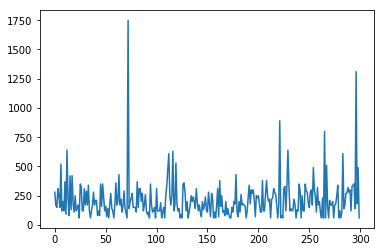

In [6]:
plt.plot(rewards)
plt.savefig('pacman_scores.png')